In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,1.475255,NaN,NaN
1,-1.386995,NaN,NaN
2,-0.008403,NaN,-1.305825
3,-0.427074,NaN,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [16]:
df.fillna(0)

,0,1,2
0,1.475255,0.000000,0.000000
1,-1.386995,0.000000,0.000000
2,-0.008403,0.000000,-1.305825
3,-0.427074,0.000000,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.475255,0.500000,0.000000
1,-1.386995,0.500000,0.000000
2,-0.008403,0.500000,-1.305825
3,-0.427074,0.500000,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [18]:
df.fillna(method="bfill")

,0,1,2
0,1.475255,1.145595,-1.305825
1,-1.386995,1.145595,-1.305825
2,-0.008403,1.145595,-1.305825
3,-0.427074,1.145595,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,1.475255,NaN,-1.305825
1,-1.386995,NaN,-1.305825
2,-0.008403,1.145595,-1.305825
3,-0.427074,1.145595,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [20]:
df.fillna(data.mean())

,0,1,2
0,1.475255,6.500000,3.000000
1,-1.386995,6.500000,3.000000
2,-0.008403,6.500000,-1.305825
3,-0.427074,6.500000,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


In [21]:
df.fillna(data.median())

,0,1,2
0,1.475255,6.500000,3.000000
1,-1.386995,6.500000,3.000000
2,-0.008403,6.500000,-1.305825
3,-0.427074,6.500000,-2.112223
4,2.326679,1.145595,-0.271434
5,1.625825,1.560193,1.113723
6,0.018952,0.531589,-1.228419


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

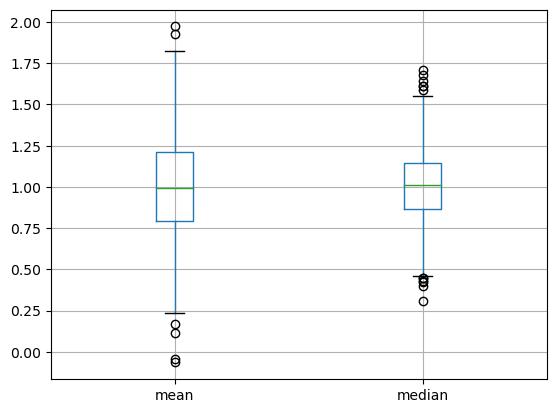

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,1.475255,NaN,NaN,1
1,-1.386995,NaN,NaN,1
2,-0.008403,NaN,-1.305825,0
3,-0.427074,NaN,-2.112223,0
4,2.326679,1.145595,-0.271434,0
5,1.625825,1.560193,1.113723,0
6,0.018952,0.531589,-1.228419,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

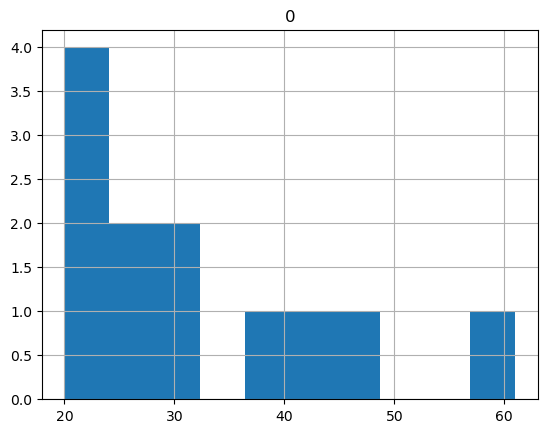

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\user\AppData\Local\Temp\ipykernel_11128\1753499592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

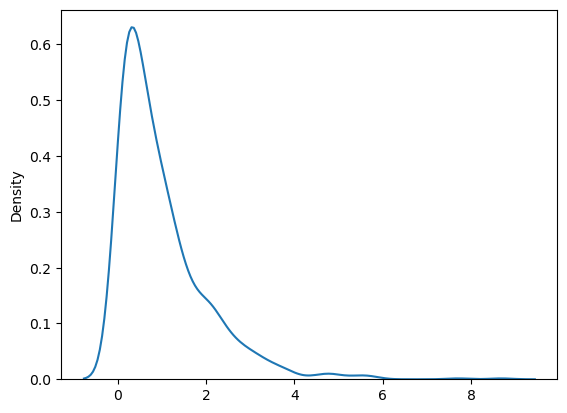

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\user\AppData\Local\Temp\ipykernel_11128\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

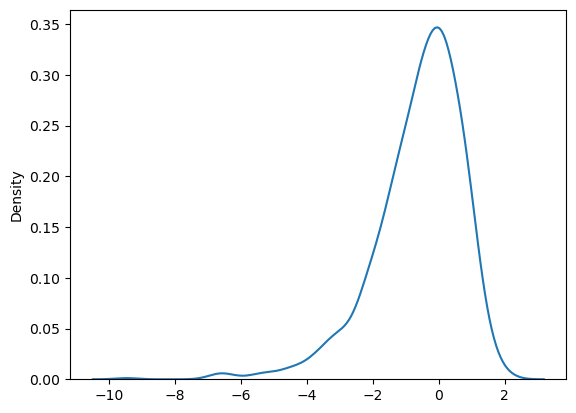

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11128\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

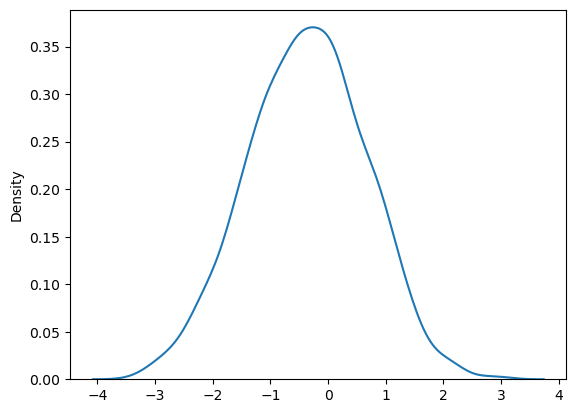

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2808569497914002

# Домашнее задание

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

**Поиск и удаление дубликатов**

In [49]:
# число дубликатов по строкам:
df.duplicated().sum()

0

In [50]:
# число дубликатов по столбцам:
df.T.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

Здесь же удалим столбец `'index'` за ненадобностью:

In [51]:
# удаление лишнего столбца с индексами:
df = df.drop('index', axis=1)
df

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,-1.0,34558,11.2,6.6,0,4,4,2004,2016,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,3,-1.0,38268,9.6,5.8,0,4,2,2013,2015,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,3,-1.0,8958,10.0,9.3,0,4,4,1991,1999,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,3,-1.0,20293,8.5,-1.0,0,5,4,2002,2004,...,1,2,13,70.0,2004.0,28,3,0,1,2755


**Обработка пропусков и некорректных значений**

In [52]:
# число уникальных значений для каждого столбца:
df.nunique()

back-suspension                      11
battery-capacity                     75
charge-time                       43212
compression                         188
consumption-mixed                   205
cylinders-order                       7
cylinders-value                      11
engine-feeding                        9
engine-start                         98
engine-stop                          97
engine-type                           5
gear-type                             3
luxury                            42703
max-speed                           268
power-electro-kw                     66
supply-system                         5
valves                             3006
valvetrain                            5
weight                             1610
configurations_auto-premiere      43227
configurations_back-wheel-base      450
configurations_front-brake            5
configurations_safety-rating          3
configurations_seats                 34
configurations_tank-volume          110


Столбцов с единственным значением в датафрейме нет.

In [53]:
# число пропусков для каждого столбца:
df.isna().sum()

back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from               0
models_group                

Как видим, явных пропусков нет.

In [54]:
# список столбцов, содержащих отрицательные значения:
df.columns[df.min() < 0]

Index(['battery-capacity', 'compression', 'consumption-mixed', 'max-speed',
       'power-electro-kw', 'weight', 'configurations_back-wheel-base',
       'configurations_tank-volume', 'supergen_year-stop'],
      dtype='object')

В каждом из столбцов датафрейма хранятся значения той или иной характеристики, которая по определению не может принимать отрицательные значения. Поэтому с ними нужно разобраться.

In [55]:
# срез отрицательных значений одного из столбцов:
df.query('`battery-capacity` < 0')['battery-capacity']

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
43240   -1.0
43241   -1.0
43242   -1.0
43243   -1.0
43244   -1.0
Name: battery-capacity, Length: 43093, dtype: float64

Во всех столбцах, содержащих отрицательные значения, аналогичная ситуация — откуда не возьмись появилось значение `-1.0`.

In [56]:
# заменяем некорректные значения пропуском NaN:
df = df.replace(-1.0, np.nan)

In [57]:
# число образовавшихся пропусков в каждом столбце (только те в которых они должны были появится):
df[['battery-capacity', 'compression', 'consumption-mixed', 'max-speed',
    'power-electro-kw', 'weight', 'configurations_back-wheel-base',
       'configurations_tank-volume', 'supergen_year-stop']].isna().sum()

battery-capacity                  43093
compression                        9320
consumption-mixed                 17271
max-speed                         14885
power-electro-kw                  43032
weight                             9399
configurations_back-wheel-base     3067
configurations_tank-volume         5408
supergen_year-stop                 4576
dtype: int64

Столбцы `'battery-capacity'` и `'power-electro-kw'` **почти полностью** оказались пустыми $=>$ их заполнять нет смысла, поэтому удалим их:

In [58]:
# удаление столбцов:
df = df.drop(['battery-capacity', 'power-electro-kw'], axis=1)
df

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,36457,9.0,4.3,0,3,4,2006,2018,2,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,3,44872,8.0,NaN,3,7,4,1982,1993,2,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,3,55927,16.0,4.2,0,4,5,2014,2018,0,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,0,41405,10.3,NaN,0,4,4,2000,2003,2,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,8,22523,19.0,NaN,0,4,8,2000,2005,0,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,34558,11.2,6.6,0,4,4,2004,2016,2,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,3,38268,9.6,5.8,0,4,2,2013,2015,2,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,3,8958,10.0,9.3,0,4,4,1991,1999,2,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,3,20293,8.5,NaN,0,5,4,2002,2004,2,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [59]:
df[['engine-stop', 'supergen_year-stop']]

,engine-stop,supergen_year-stop
0,2018,2018.0
1,1993,1993.0
2,2018,2019.0
3,2003,2003.0
4,2005,2005.0
...,...,...
43240,2016,2016.0
43241,2015,2015.0
43242,1999,1999.0
43243,2004,2004.0


In [60]:
df.query('abs(`engine-stop` - `supergen_year-stop`) == 0')['engine-stop'].count() / 43245 * 100

61.76899063475546

Более половины значений в столбцах `'engine-stop'` и `'supergen_year-stop'` совпадают.

In [61]:
# коэффициент корреляции Кендалла:
df['engine-stop'].corr(df['supergen_year-stop'], method='kendall')

0.9282580308879905

Коэффициент корреляции говорит об **очень тесной** связи между данными факторами, так что один из них следует удалить. Удалим `'supergen_year-stop'`:

In [62]:
df = df.drop('supergen_year-stop', axis=1)
df

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,36457,9.0,4.3,0,3,4,2006,2018,2,...,1300.0,1,2,13,40.0,16,3,0,1,2360
1,3,44872,8.0,NaN,3,7,4,1982,1993,2,...,1555.0,4,2,13,108.0,34,3,0,1,3060
2,3,55927,16.0,4.2,0,4,5,2014,2018,0,...,1534.0,4,2,13,55.0,35,3,0,1,2648
3,0,41405,10.3,NaN,0,4,4,2000,2003,2,...,1495.0,4,2,13,55.0,10,3,0,1,2513
4,8,22523,19.0,NaN,0,4,8,2000,2005,0,...,1515.0,4,1,13,62.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,34558,11.2,6.6,0,4,4,2004,2016,2,...,1425.0,1,2,13,47.0,15,3,0,1,2510
43241,3,38268,9.6,5.8,0,4,2,2013,2015,2,...,1551.0,4,2,13,65.0,10,3,0,1,2808
43242,3,8958,10.0,9.3,0,4,4,1991,1999,2,...,1460.0,4,2,13,55.0,16,3,0,1,2520
43243,3,20293,8.5,NaN,0,5,4,2002,2004,2,...,1548.0,1,2,13,70.0,28,3,0,1,2755


Во всех остальных стобцах заполним пропуски медианой:

In [63]:
df = df.fillna(df.median())
df

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,36457,9.0,4.3,0,3,4,2006,2018,2,...,1300.0,1,2,13,40.0,16,3,0,1,2360
1,3,44872,8.0,7.4,3,7,4,1982,1993,2,...,1555.0,4,2,13,108.0,34,3,0,1,3060
2,3,55927,16.0,4.2,0,4,5,2014,2018,0,...,1534.0,4,2,13,55.0,35,3,0,1,2648
3,0,41405,10.3,7.4,0,4,4,2000,2003,2,...,1495.0,4,2,13,55.0,10,3,0,1,2513
4,8,22523,19.0,7.4,0,4,8,2000,2005,0,...,1515.0,4,1,13,62.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,34558,11.2,6.6,0,4,4,2004,2016,2,...,1425.0,1,2,13,47.0,15,3,0,1,2510
43241,3,38268,9.6,5.8,0,4,2,2013,2015,2,...,1551.0,4,2,13,65.0,10,3,0,1,2808
43242,3,8958,10.0,9.3,0,4,4,1991,1999,2,...,1460.0,4,2,13,55.0,16,3,0,1,2520
43243,3,20293,8.5,7.4,0,5,4,2002,2004,2,...,1548.0,1,2,13,70.0,28,3,0,1,2755


In [64]:
df.isna().sum()

back-suspension                   0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
models_country-from               0
models_group                      0
models_light-and-commercial       0
models_male                       0
target                      

Отдельно разберемся с нулем в столбце `'engine-stop'`:

In [65]:
df.query('`engine-stop` == 0')

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial,models_male,target
6,3,10569,16.5,4.7,0,4,5,2019,0,0,...,1565.0,4,1,13,48.0,34,3,0,1,2670
13,10,27944,10.1,7.4,0,6,4,2007,0,0,...,1494.0,4,2,17,60.0,16,3,0,1,2730
33,8,56104,11.0,5.2,0,4,4,2013,0,2,...,1460.0,4,1,13,40.0,35,3,0,1,2489
41,3,20348,10.1,9.0,0,4,4,2003,0,2,...,1440.0,1,2,27,60.0,5,3,0,1,3025
77,3,5992,9.5,8.1,0,4,2,2016,0,2,...,1532.0,4,2,4,54.0,10,3,0,1,2475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43222,3,58536,17.3,8.2,0,4,5,2013,0,0,...,1570.0,4,2,13,65.0,16,3,0,1,2845
43230,3,47424,10.1,10.8,3,6,4,2018,0,2,...,1489.0,4,2,4,40.0,34,3,0,1,2370
43231,3,1047,10.1,6.1,0,4,5,2018,0,0,...,1600.0,4,1,25,69.0,9,3,0,1,3275
43233,3,44580,9.6,6.6,0,4,2,2018,0,2,...,1552.0,4,2,8,50.0,10,3,0,1,2505


На мой взгляд, лучшим вариантом будет просто удалить эти строки, т. к. заполнить их особо нечем.

In [66]:
df = df.query('`engine-stop` != 0').reset_index(drop=True)
df

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,36457,9.0,4.3,0,3,4,2006,2018,2,...,1300.0,1,2,13,40.0,16,3,0,1,2360
1,3,44872,8.0,7.4,3,7,4,1982,1993,2,...,1555.0,4,2,13,108.0,34,3,0,1,3060
2,3,55927,16.0,4.2,0,4,5,2014,2018,0,...,1534.0,4,2,13,55.0,35,3,0,1,2648
3,0,41405,10.3,7.4,0,4,4,2000,2003,2,...,1495.0,4,2,13,55.0,10,3,0,1,2513
4,8,22523,19.0,7.4,0,4,8,2000,2005,0,...,1515.0,4,1,13,62.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39014,9,34558,11.2,6.6,0,4,4,2004,2016,2,...,1425.0,1,2,13,47.0,15,3,0,1,2510
39015,3,38268,9.6,5.8,0,4,2,2013,2015,2,...,1551.0,4,2,13,65.0,10,3,0,1,2808
39016,3,8958,10.0,9.3,0,4,4,1991,1999,2,...,1460.0,4,2,13,55.0,16,3,0,1,2520
39017,3,20293,8.5,7.4,0,5,4,2002,2004,2,...,1548.0,1,2,13,70.0,28,3,0,1,2755


## Baseline

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [68]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
reg = LinearRegression().fit(train_X, train_y)

In [70]:
reg.score(train_X, train_y)

0.5787345436673299

In [71]:
mean_squared_error(reg.predict(train_X), train_y)

22251.959986373484

In [72]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [73]:
scores

{'fit_time': array([0.06290984, 0.06066036, 0.07288504]),
 'score_time': array([0.00896168, 0.0093441 , 0.00792241]),
 'test_score': array([-23450.07655935, -21861.84805147, -21776.39974655])}

In [74]:
mean_squared_error(reg.predict(test_X), test_y)

23121.88480000904